# **Basic Python**

## 1.a 
Give a function F that takes a single argument n. This function should print a sequence of n strings as described in the examples below: <br>
Ex: **n = 3**

--A--<br>
-BAB-<br>
CBABC<br>

**n = 4**

---A---<br>
--BAB--<br>
-CBABC-<br>
DCBABCD

In [201]:
def F(n):
    for i in range(n):
        for j in range(n-i-1):
            print("-", end="")
        for j in range(i):
            print(chr(65+i-j), end="")
        print("A", end="")
        for j in range(i-1, -1, -1):
            print(chr(65+i-j), end="")
        for j in range(n-i-1):
            print("-", end="")
        print("\n")
    pass


# Tests
F(10)
F(6)

---------A---------

--------BAB--------

-------CBABC-------

------DCBABCD------

-----EDCBABCDE-----

----FEDCBABCDEF----

---GFEDCBABCDEFG---

--HGFEDCBABCDEFGH--

-IHGFEDCBABCDEFGHI-

JIHGFEDCBABCDEFGHIJ

-----A-----

----BAB----

---CBABC---

--DCBABCD--

-EDCBABCDE-

FEDCBABCDEF



## 1.b
Make a function F that takes only one argument, a dictionary(dict) d.
The keys of d are integers and the values of d are a tuple of type (x (int), y (int)).
You must print out the dict in the format "-key-, -x-, -y-" with each entry in a new line. Print it for each of the three sorted orders, by key values ascending, by x values descending, by y values ascending.

In [202]:
def F(d: dict):

    print("Key Values Ascending:")
    PrintDict(dict(sorted(d.items(), key=lambda item: item[0])))

    print("\nx Values Descending:")
    PrintDict(
        dict(sorted(d.items(), key=lambda item: item[1][0], reverse=True)))

    print("\ny Values Ascending:")
    PrintDict(dict(sorted(d.items(), key=lambda item: item[1][1])))

    print("\n")

    pass


def PrintDict(d: dict):
    for key in d:
        print("%d,%d,%d" % (key, d[key][0], d[key][1]))
    pass


# Tests
F({1: (1, 2), 2: (-1, 4), 5: (-4, 3), 4: (2, 3)})
F({-8: (4, 2), 6: (-3, 4), 7: (2, 1), 5: (9, -10)})

Key Values Ascending:
1,1,2
2,-1,4
4,2,3
5,-4,3

x Values Descending:
4,2,3
1,1,2
2,-1,4
5,-4,3

y Values Ascending:
1,1,2
5,-4,3
4,2,3
2,-1,4


Key Values Ascending:
-8,4,2
5,9,-10
6,-3,4
7,2,1

x Values Descending:
5,9,-10
-8,4,2
7,2,1
6,-3,4

y Values Ascending:
5,9,-10
7,2,1
-8,4,2
6,-3,4




## 2 Working with Student Records

Use the data in **student_records.csv** to complete the given tasks. Do not include any external libraries. Use a Python dictionary if required.

### Reference
- [Python Dictionaries](https://www.w3schools.com/python/python_dictionaries.asp)


#### 2.a: open the student_records.csv file and print out the first 10 rows

In [203]:
file = open("student_records.csv", "r")
for i in range(10):
    print(file.readline(), end="")

roll_number,department,credit,course_name,course_type,grade
588946,MA,3,EC250,hasmed_elective,AB
145372,EP,4,EP407,hasmed_elective,CC
834515,MA,8,EP885,hasmed_elective,BB
344265,CSE,6,CSE699,honours,AB
358405,MA,3,EE460,minor,AP
781075,CE,8,CE540,honours,CC
180828,CSE,6,CE880,minor,AB
981238,MM,4,CSE226,minor,AB
836881,MM,8,MM530,core,AA


#### 2.b: Print out the total credits and calculte CPI of each student. 
CPI is the weighted average of core courses, and electives (weights being the letter grades converted to number AP,AA=10, AB=9, BB=9, BC=7, CC=6)

In [204]:
GRADE_CONVERT = {"AP": 10, "AA": 10, "AB": 9, "BB": 8, "BC": 7, "CC": 6}

file = open("student_records.csv")
lines = file.readlines()[1:]

student_dict = {}

for line in lines:
    data = line.split(",")
    student_details = (data[0], data[1])
    course_dict = {"Credits": int(data[2]), "Course Code": data[3],
                   "Course Type": data[4], "Grade": GRADE_CONVERT[data[5].replace('\n', '')]}
    if student_details in student_dict:
        student_dict[student_details].append(course_dict)
    else:
        student_dict[student_details] = [course_dict]

file.close()

for student in student_dict:
    print("Roll Number: " +
          student[0] + ", Department: " + student[1] + ", CPI: ", end="")
    sum = 0
    creds = 0
    for course in student_dict[student]:
        sum += course["Credits"] * course["Grade"]
        creds += course["Credits"]
    print(sum/creds)

Roll Number: 588946, Department: MA, CPI: 8.693467336683417
Roll Number: 145372, Department: EP, CPI: 7.745664739884393
Roll Number: 834515, Department: MA, CPI: 8.21608040201005
Roll Number: 344265, Department: CSE, CPI: 8.699346405228757
Roll Number: 358405, Department: MA, CPI: 8.587378640776699
Roll Number: 781075, Department: CE, CPI: 8.170731707317072
Roll Number: 180828, Department: CSE, CPI: 8.096045197740112
Roll Number: 981238, Department: MM, CPI: 8.244047619047619
Roll Number: 836881, Department: MM, CPI: 8.386178861788618
Roll Number: 310604, Department: EE, CPI: 8.333333333333334
Roll Number: 847809, Department: IE, CPI: 8.210727969348659
Roll Number: 773982, Department: EE, CPI: 8.068181818181818
Roll Number: 500658, Department: CE, CPI: 8.16826923076923
Roll Number: 810863, Department: CE, CPI: 8.151041666666666
Roll Number: 124663, Department: EE, CPI: 8.126637554585153
Roll Number: 364146, Department: MA, CPI: 8.395555555555555
Roll Number: 871746, Department: IE, CPI

#### 2.c: Print out the names of all students who meet the graduation requirements 
Atleast 20 credist of core course, 15 credits of department elective, 10 credits of flexible elective and 5 credits of hasmed electives

In [205]:
GRADE_CONVERT = {"AP": 10, "AA": 10, "AB": 9, "BB": 8, "BC": 7, "CC": 6}

file = open("student_records.csv")
lines = file.readlines()[1:]

student_dict = {}

for line in lines:
    data = line.split(",")
    student_details = (data[0], data[1])
    course_dict = {"Credits": int(data[2]), "Course Code": data[3],
                   "Course Type": data[4], "Grade": GRADE_CONVERT[data[5].replace('\n', '')]}
    if student_details in student_dict:
        student_dict[student_details].append(course_dict)
    else:
        student_dict[student_details] = [course_dict]

file.close()

for student in student_dict:
    core_creds = 0
    dept_elect_creds = 0
    flex_elect_creds = 0
    hasmed_elect_creds = 0
    for course in student_dict[student]:
        match course["Course Type"]:
            case "core":
                core_creds += course["Credits"]
            case "department_elective":
                dept_elect_creds += course["Credits"]
            case "flexible_elective":
                flex_elect_creds += course["Credits"]
            case "hasmed_elective":
                hasmed_elect_creds += course["Credits"]
            case _:
                pass
    if (core_creds >= 20 and dept_elect_creds >= 15 and flex_elect_creds >= 10 and hasmed_elect_creds >= 5):
        print("Roll Number: " + student[0] + ", Department: " + student[1])

Roll Number: 588946, Department: MA
Roll Number: 834515, Department: MA
Roll Number: 781075, Department: CE
Roll Number: 180828, Department: CSE
Roll Number: 981238, Department: MM
Roll Number: 836881, Department: MM
Roll Number: 310604, Department: EE
Roll Number: 773982, Department: EE
Roll Number: 500658, Department: CE
Roll Number: 810863, Department: CE
Roll Number: 124663, Department: EE
Roll Number: 871746, Department: IE
Roll Number: 986057, Department: ME
Roll Number: 379479, Department: MA
Roll Number: 144528, Department: ME
Roll Number: 485484, Department: MM
Roll Number: 845623, Department: EE
Roll Number: 150503, Department: CH
Roll Number: 214270, Department: CH
Roll Number: 517837, Department: CH
Roll Number: 482623, Department: IE
Roll Number: 721490, Department: EP
Roll Number: 955757, Department: MM
Roll Number: 143856, Department: CE
Roll Number: 571782, Department: ME
Roll Number: 973158, Department: EE
Roll Number: 703403, Department: EC
Roll Number: 960395, Depart

#### 2.d: Print out the names of all students who completed a minor 
Atleast 10 credits with minor tag in a specific department

In [206]:
GRADE_CONVERT = {"AP": 10, "AA": 10, "AB": 9, "BB": 8, "BC": 7, "CC": 6}

file = open("student_records.csv")
lines = file.readlines()[1:]

student_dict = {}

for line in lines:
    data = line.split(",")
    student_details = (data[0], data[1])
    course_dict = {"Credits": int(data[2]), "Course Code": data[3],
                   "Course Type": data[4], "Grade": GRADE_CONVERT[data[5].replace('\n', '')]}
    if student_details in student_dict:
        student_dict[student_details].append(course_dict)
    else:
        student_dict[student_details] = [course_dict]

file.close()

for student in student_dict:
    minor_dict = {}
    for course in student_dict[student]:
        if course["Course Type"] == "minor":
            minor_dept = course["Course Code"][:2]
            if minor_dept in minor_dict:
                minor_dict[minor_dept] += course["Credits"]
            else:
                minor_dict[minor_dept] = course["Credits"]
    for minor in minor_dict:
        if minor_dict[minor] >= 10:
            print("Roll Number: " + student[0] + ", Department: " +
                  student[1] + " Completed a Minor in " + minor + " Department.")

Roll Number: 588946, Department: MA Completed a Minor in ME Department.
Roll Number: 588946, Department: MA Completed a Minor in EP Department.
Roll Number: 145372, Department: EP Completed a Minor in EC Department.
Roll Number: 145372, Department: EP Completed a Minor in EE Department.
Roll Number: 344265, Department: CSE Completed a Minor in ME Department.
Roll Number: 344265, Department: CSE Completed a Minor in CE Department.
Roll Number: 358405, Department: MA Completed a Minor in CH Department.
Roll Number: 781075, Department: CE Completed a Minor in EC Department.
Roll Number: 836881, Department: MM Completed a Minor in CH Department.
Roll Number: 836881, Department: MM Completed a Minor in EE Department.
Roll Number: 836881, Department: MM Completed a Minor in EP Department.
Roll Number: 847809, Department: IE Completed a Minor in ME Department.
Roll Number: 847809, Department: IE Completed a Minor in EP Department.
Roll Number: 847809, Department: IE Completed a Minor in CH De

#### 2.e: Print out the names of all students who completed a honours
Atleast 10 credits with honours tag and 20 core credits

In [207]:
GRADE_CONVERT = {"AP": 10, "AA": 10, "AB": 9, "BB": 8, "BC": 7, "CC": 6}

file = open("student_records.csv")
lines = file.readlines()[1:]

student_dict = {}

for line in lines:
    data = line.split(",")
    student_details = (data[0], data[1])
    course_dict = {"Credits": int(data[2]), "Course Code": data[3],
                   "Course Type": data[4], "Grade": GRADE_CONVERT[data[5].replace('\n', '')]}
    if student_details in student_dict:
        student_dict[student_details].append(course_dict)
    else:
        student_dict[student_details] = [course_dict]

file.close()

for student in student_dict:
    core_creds = 0
    honors_creds = 0
    for course in student_dict[student]:
        if course["Course Type"] == "core":
            core_creds += course["Credits"]
        elif course["Course Type"] == "honours":
            honors_creds += course["Credits"]

    if core_creds >= 20 and honors_creds >= 10:
        print("Roll Number: " + student[0] + ", Department: " + student[1])

Roll Number: 588946, Department: MA
Roll Number: 145372, Department: EP
Roll Number: 834515, Department: MA
Roll Number: 781075, Department: CE
Roll Number: 836881, Department: MM
Roll Number: 310604, Department: EE
Roll Number: 773982, Department: EE
Roll Number: 500658, Department: CE
Roll Number: 810863, Department: CE
Roll Number: 124663, Department: EE
Roll Number: 364146, Department: MA
Roll Number: 871746, Department: IE
Roll Number: 986057, Department: ME
Roll Number: 718510, Department: EP
Roll Number: 379479, Department: MA
Roll Number: 582912, Department: CH
Roll Number: 788020, Department: CE
Roll Number: 613401, Department: CE
Roll Number: 144528, Department: ME
Roll Number: 485484, Department: MM
Roll Number: 199713, Department: EE
Roll Number: 845623, Department: EE
Roll Number: 150503, Department: CH
Roll Number: 214270, Department: CH
Roll Number: 517837, Department: CH
Roll Number: 482623, Department: IE
Roll Number: 721490, Department: EP
Roll Number: 955757, Departm

# **SciPy** 

## Part A
Minimize the function $f(x, y) = 2(x - y - 3)^2 + 4(x + 2y + 1)^4$.<br>
With the constraints : $ x - y \ge -3, (x + 2)^2 + (y + 1)^2 \le 5$ <br>
Using scipy.optimize.minimize with constraints. (Hint: Look at the examples in the official documentation)

In [208]:
from scipy.optimize import LinearConstraint
from scipy.optimize import NonlinearConstraint
from scipy.optimize import minimize
import numpy as np

def fun(x):
    return 2*(x[0]-x[1]-3)**2 + 4*(x[0]+2*x[1]+1)**4

def cons_f(x):
    return (x[0]+2)**2 + (x[1]+1)**2

linear_constraint = LinearConstraint([1, -1], -3, np.inf)
non_linear_constraint = NonlinearConstraint(cons_f, -np.inf, 5)
res = minimize(fun, np.random.random(2), constraints=[linear_constraint, non_linear_constraint])
print("x = ", res.x[0], ", y = ", res.x[1])

x =  0.23492502316727365 , y =  -0.9285147416380921


# Part B
Evaluate the line integral of the function $f(x, y) = x^2 + y^4$ along the circle $ x^2 + y^2 = 3 $ anticlockwise (scalar integral, not vector). You must use scipy for integration but you may use parameterization

In [209]:
from numpy import sin, cos, pi, sqrt
from scipy import integrate

result = integrate.quad(lambda x : sqrt(3) * (cos(x) ** 2 + sin(x) ** 4), 0, 2*pi)
print("Answer: ", result[0])
print("Error: ", result[1])

Answer:  9.522446662229642
Error:  9.984747195712629e-10


# **Numpy**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [210]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [211]:
# Load data from data_path
# Check the input file spice_locations.txt to understand the Data Format
# Return : np array of size Nx2
def load_data(data_path):
    file = open(data_path)
    lines = file.readlines()
    return np.array(list(map(lambda line:
                             np.fromiter(map(lambda coord:
                                             coord.replace("\n", ""),
                                             line.split(',')),
                                         dtype=np.longdouble),
                             lines)))

In [212]:
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers=None):
    if not init_centers:
        return data[np.random.choice(data.shape[0], K, replace=False), :]
    else:
        return init_centers

In [213]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    return np.full(len(data), 1)

In [214]:
# TODO 3.1 : E step
# For Each data point, find the distance to each center
# Return : np array of size NxK
def calculate_distances(data, centers):
    return np.array(list(map(lambda point:
                             list(map(lambda center:
                                      np.sqrt((point[0] - center[0])**2
                                              + (point[1] - center[1])**2),
                                      centers)),
                             data)))

In [215]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    return np.array(list(map(np.argmin, distances)))

In [216]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2

def update_centers(data, labels, K):
    sum_points = np.zeros((K, 2))
    count_points = np.zeros(K)
    
    np.add.at(sum_points, labels, data)
    np.add.at(count_points, labels, 1)

    return sum_points / count_points[:, None]

In [217]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    return np.array_equal(labels1, labels2)

In [218]:
# DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path: str, K: int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time()  # Time stamp

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new):
            break
        else:
            labels = labels_new

    end_time = time.time()  # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time

In [219]:
### TODO 7
def visualise(data_path, labels, centers):
    data = load_data(data_path)

    # Scatter plot of the data points
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

    ### Set title as 'K-means clustering'
    plt.title("K-means clustering")

    ### Set xlabel as 'Longitude'
    plt.xlabel("Longitude")

    ### Set ylabel as 'Latitude'
    plt.ylabel("Latitude")

    ### Save the plot as 'kmeans.png'
    plt.savefig("kmeans.png")


    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.0


<module 'matplotlib.pyplot' from 'C:\\Users\\harsh\\Desktop\\Coding\\python-projects\\CPP-Assignment-Solved\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

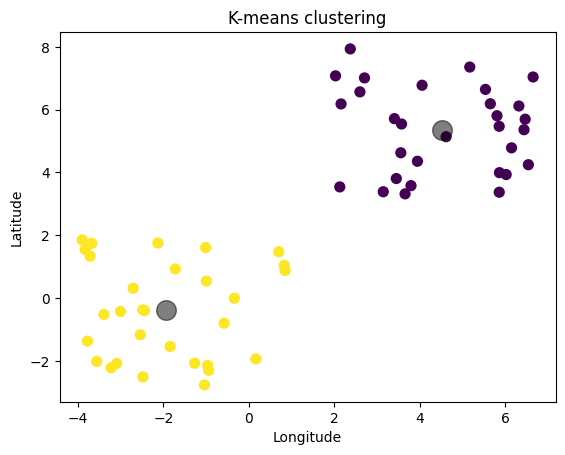

In [220]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)